In [1]:
import numpy as np ## for linear Algebra
import pandas as pd ## for data Preprocessing
##for visualization
import matplotlib.pyplot as plt
import seaborn as sns
## for warnings to avoid
import warnings
warnings.filterwarnings('ignore')


In [2]:
##pip install keras
##pip install tensorflow

In [3]:
## for Deep Learning
import keras

from keras.models import Sequential
from keras.layers import Dense

In [4]:
## Data preprocessing
from sklearn.preprocessing import StandardScaler , LabelBinarizer
from sklearn.utils import shuffle

In [5]:
## Data Loading
from sklearn.datasets import load_iris

In [6]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
data = pd.DataFrame(data = np.c_[data['data'],data['target']],columns = data['feature_names'] + ['target'])

In [8]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# Exploratory Data Analysis

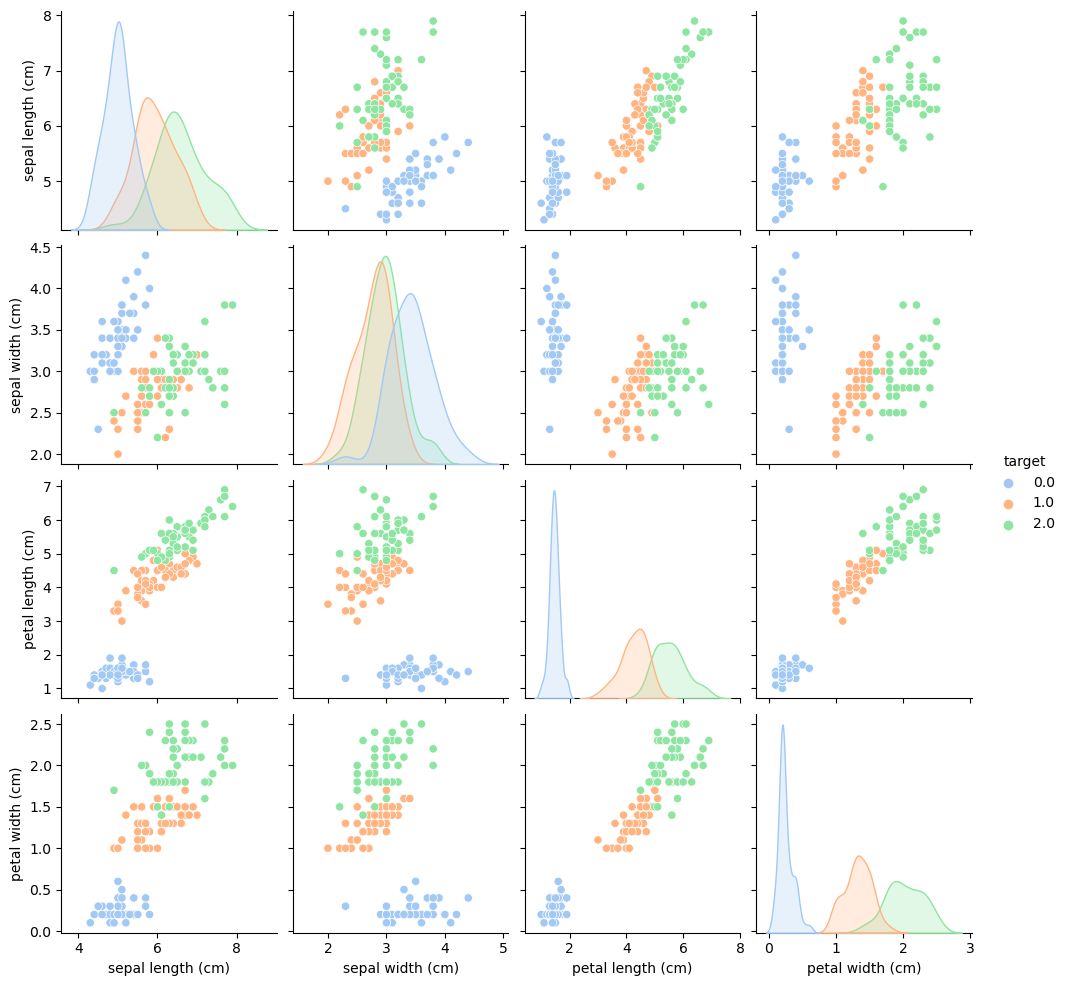

In [9]:
sns.pairplot(data=data,hue='target',palette='pastel')

# Heat Map

<Axes: >

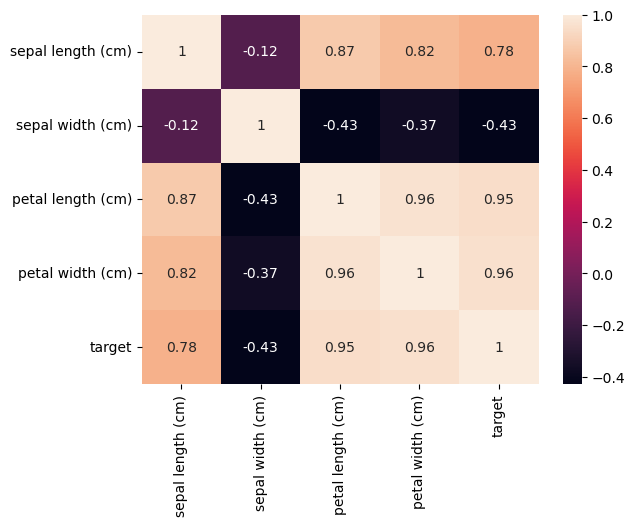

In [10]:
## If the Value is positive then the variables are positively correlated
## If the value is negative then the variables are negatively correlated
sns.heatmap(data=data.corr(),annot=True)


From above heatmap we can say Petal Length and Petal Width are highly correlated with each other

In [11]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [12]:
## We will shuffle() the data because as we can see from above table the target variable has 0,1,2 classes all together

In [13]:
data = shuffle(data)

In [14]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
69,5.6,2.5,3.9,1.1,1.0
92,5.8,2.6,4.0,1.2,1.0
71,6.1,2.8,4.0,1.3,1.0
70,5.9,3.2,4.8,1.8,1.0
25,5.0,3.0,1.6,0.2,0.0
...,...,...,...,...,...
75,6.6,3.0,4.4,1.4,1.0
1,4.9,3.0,1.4,0.2,0.0
103,6.3,2.9,5.6,1.8,2.0
83,6.0,2.7,5.1,1.6,1.0


In [15]:
## Split the data into X and y 

In [16]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [17]:
X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
target = data[['target']]
y_true = target.copy()

In [18]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
69,5.6,2.5,3.9,1.1
92,5.8,2.6,4.0,1.2
71,6.1,2.8,4.0,1.3
70,5.9,3.2,4.8,1.8
25,5.0,3.0,1.6,0.2
...,...,...,...,...
75,6.6,3.0,4.4,1.4
1,4.9,3.0,1.4,0.2
103,6.3,2.9,5.6,1.8
83,6.0,2.7,5.1,1.6


In [19]:
target

,target
69,1.0
92,1.0
71,1.0
70,1.0
25,0.0
...,...
75,1.0
1,0.0
103,2.0
83,1.0


# Train the Model

In [20]:
X = StandardScaler().fit_transform(X)

In [21]:
X

array([[-2.94841818e-01, -1.28296331e+00,  8.07091462e-02,
        -1.30754636e-01],
       [-5.25060772e-02, -1.05276654e+00,  1.37546573e-01,
         8.77547895e-04],
       [ 3.10997534e-01, -5.92373012e-01,  1.37546573e-01,
         1.32509732e-01],
       [ 6.86617933e-02,  3.28414053e-01,  5.92245988e-01,
         7.90670654e-01],
       [-1.02184904e+00, -1.31979479e-01, -1.22655167e+00,
        -1.31544430e+00],
       [-1.02184904e+00, -2.43394714e+00, -1.46640561e-01,
        -2.62386821e-01],
       [ 1.28034050e+00,  9.82172869e-02,  7.62758269e-01,
         1.44883158e+00],
       [-1.73673948e-01,  3.09077525e+00, -1.28338910e+00,
        -1.05217993e+00],
       [-2.94841818e-01, -1.31979479e-01,  1.94384000e-01,
         1.32509732e-01],
       [ 1.03800476e+00, -1.31979479e-01,  8.19595696e-01,
         1.44883158e+00],
       [ 1.89829664e-01, -1.97355361e+00,  7.05920842e-01,
         3.95774101e-01],
       [-5.37177559e-01,  7.88807586e-01, -1.16971425e+00,
      

In [22]:
target = LabelBinarizer().fit_transform(target)

In [23]:
target

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0,

Split the data into train and test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,target,test_size=0.2,random_state=101)

# Model

In [26]:
model = Sequential()

In [27]:
model.add(Dense(12,input_dim=4,activation='relu'))

model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
history = model.fit(X_train,y_train, epochs = 120, validation_data=(X_test,y_test))

Epoch 1/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.2377 - loss: 1.1036 - val_accuracy: 0.3333 - val_loss: 1.0805
Epoch 2/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3167 - loss: 1.0857 - val_accuracy: 0.6333 - val_loss: 1.0572
Epoch 3/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5560 - loss: 1.0636 - val_accuracy: 0.7000 - val_loss: 1.0375
Epoch 4/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6631 - loss: 1.0461 - val_accuracy: 0.7333 - val_loss: 1.0191
Epoch 5/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6975 - loss: 1.0262 - val_accuracy: 0.7333 - val_loss: 0.9980
Epoch 6/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6823 - loss: 1.0082 - val_accuracy: 0.7667 - val_loss: 0.9748
Epoch 7/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6898 - loss: 0.9842 - val_accuracy: 0.7667 - val_loss: 0.9505
Epoch 8/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7804 - loss: 0.9608 - val_accuracy: 0.7667 - val_loss

Epoch 52/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9710 - loss: 0.1523 - val_accuracy: 0.9667 - val_loss: 0.1517
Epoch 53/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9658 - loss: 0.1472 - val_accuracy: 0.9667 - val_loss: 0.1456
Epoch 54/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9710 - loss: 0.1340 - val_accuracy: 0.9667 - val_loss: 0.1452
Epoch 55/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9556 - loss: 0.1568 - val_accuracy: 0.9667 - val_loss: 0.1367
Epoch 56/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9858 - loss: 0.1206 - val_accuracy: 0.9667 - val_loss: 0.1281
Epoch 57/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9650 - loss: 0.1275 - val_accuracy: 0.9667 - val_loss: 0.1216
Epoch 58/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9681 - loss: 0.1282 - val_accuracy: 0.9667 - val_loss: 0.1148
Epoch 59/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9912 - loss: 0.1067 - val_accuracy: 0.9667 - v

Epoch 103/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9915 - loss: 0.0349 - val_accuracy: 0.9667 - val_loss: 0.0611
Epoch 104/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9852 - loss: 0.0488 - val_accuracy: 0.9667 - val_loss: 0.0623
Epoch 105/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9915 - loss: 0.0462 - val_accuracy: 0.9667 - val_loss: 0.0628
Epoch 106/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9967 - loss: 0.0289 - val_accuracy: 0.9667 - val_loss: 0.0631
Epoch 107/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9852 - loss: 0.0561 - val_accuracy: 0.9667 - val_loss: 0.0613
Epoch 108/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9852 - loss: 0.0514 - val_accuracy: 0.9667 - val_loss: 0.0610
Epoch 109/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9915 - loss: 0.0432 - val_accuracy: 0.9667 - val_loss: 0.0646
Epoch 110/120
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9946 - loss: 0.0370 - val_accuracy: 0.

# Predicting Targets for Test set from the model trained on train data

In [29]:
from sklearn.metrics import accuracy_score, classification_report

In [30]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


# Model Performance

In [31]:
y_test

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [32]:
y_test = np.argmax(y_test,axis=1)

In [33]:
y_test

array([0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1,
       2, 2, 2, 1, 1, 0, 1, 0], dtype=int64)

# Plot Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
y_pred

array([[9.9973732e-01, 2.6259606e-04, 1.2898562e-07],
       [3.1131000e-05, 1.0213431e-02, 9.8975545e-01],
       [6.9864018e-07, 1.6675169e-04, 9.9983251e-01],
       [9.9995863e-01, 4.1334810e-05, 1.4361824e-08],
       [4.2162650e-05, 9.5496373e-03, 9.9040818e-01],
       [2.5777585e-11, 2.1546241e-07, 9.9999976e-01],
       [9.9983251e-01, 1.6737226e-04, 1.5484534e-07],
       [9.9946958e-01, 5.2963372e-04, 8.5418162e-07],
       [9.9877602e-01, 1.2232655e-03, 7.7371391e-07],
       [6.2201847e-04, 9.9866664e-01, 7.1132503e-04],
       [9.3895569e-06, 3.2022018e-03, 9.9678838e-01],
       [9.9920923e-01, 7.8978995e-04, 1.0181774e-06],
       [2.0659869e-03, 9.7843802e-01, 1.9496020e-02],
       [1.0318648e-03, 2.2398053e-01, 7.7498764e-01],
       [2.3664275e-04, 2.1317881e-01, 7.8658456e-01],
       [6.8161765e-04, 9.9679047e-01, 2.5278828e-03],
       [9.9953640e-01, 4.6318604e-04, 5.3123097e-07],
       [9.9996328e-01, 3.6657359e-05, 1.8543743e-08],
       [9.9930990e-01, 6.885

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.tolist(),y_pred.tolist())

## As i ended up with an error so i commented out the remaining code for the same 

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [47]:
##ax = plt.subplot()
##sns.heatmap(cm, annot=True,ax = ax)

##ax.set_xlabel('Predicted Labels'); ax.set_ylabels('True Labels');
##ax.set_title('Confusion Matrix');
##ax.xaxis.set_ticklabels(['setosa','versicolor','virginica']);
##ax.yaxis.set_ticklabels(['setosa','versicolor','virginica'])

In [48]:
##from sklearn.metrics import precision_recall_fscore_support

In [49]:
##precision_recall_fscore_support(y_test.tolist(),y_pred.tolist(), average = 'macro')

# The End